Unsharped mask

In [ ]:
import cv2
import numpy as np

ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)
ngain = float(input('Enter noise gain:'))       # 잡음의 gain (클수록 잡음이 커진다)

width = 320
height = 240
cap =  cv2.VideoCapture(0, cv2.CAP_MSMF)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

while True:
    ret, frame = cap.read()
    if ret:
        t_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
        Y, Cr, Cb = cv2.split(t_frame)
        blur = cv2.GaussianBlur(Y, (0,0), 2)
        filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
        cfiltered = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)
        cframe = np.hstack((cv2.flip(frame, 1), cv2.flip(cfiltered, 1)))
        cv2.imshow('Original, Unsharp-mask', cframe)
        
        key = cv2.waitKey(33)
        if key == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

Contour 추출 -> Slice
### 박종혁 81
- Kernel size = 21
- scale = 0.3

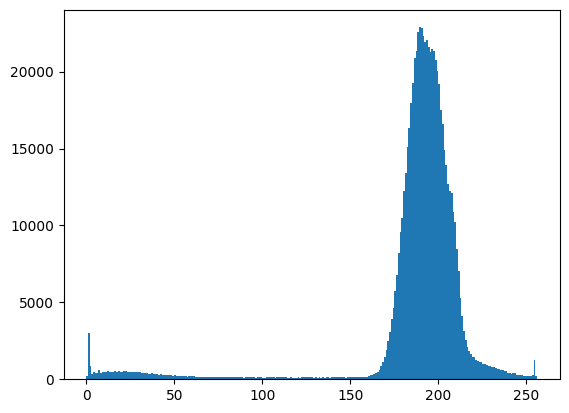

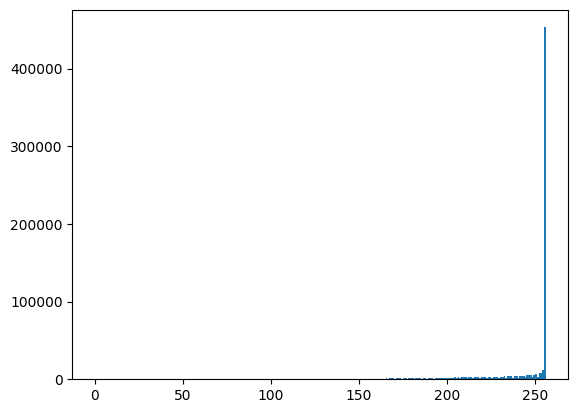

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size #
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/jong.jpg"
img = cv2.imread(path)
scale = 0.3
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용 #
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

cv2.imshow("img_unsharped0", img_unsharped)

# Grayscale로 변경 #
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)
cv2.imshow("img_gray", img_gray)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold #
_, img_bin = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)

# LPF 적용 #
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold #
_, filtered0 = cv2.threshold(filtered, 230, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

cv2.imshow("gray1", filtered)

# Contour # 
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

# contour_pos = []    # Contour 좌표 추출
# for pos in range(len(contours)):    
#     area = cv2.contourArea(contours[pos])
#     if area > 5:
#         contour_pos.append(pos)

# img_temp = img_bin  # 글씨 추출 source
# tmp0 = 5     # 사각형 여유
# i = 0

# for pos in contour_pos:     # 면적 부분 오려내기
#     x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
#     # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
#     if h > w :
#         tmp1 = int((h-w)/2)
#         img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
#     else:
#         tmp1 = int((w-h)/2)
#         img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
#     path = "./dataset/pjh/pjh_" + str(i) + ".jpg"
#     cv2.imwrite(path, img_crop) # 추출 글씨 저장
#     i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()



In [259]:
import cv2

h = []
w = []

# img size check
for i in range(81):
    path = "./dataset/pjh/pjh_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 60:
        print("max", img.shape, i)
    if max(shape) < 50:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (75, 74, 3) 0
max (70, 70, 3) 1
max (61, 61, 3) 3
max (75, 75, 3) 4
max (71, 71, 3) 5
max (64, 63, 3) 6
max (70, 70, 3) 7
max (74, 71, 3) 8
max (66, 66, 3) 11
max (65, 65, 3) 12
max (67, 66, 3) 13
max (62, 62, 3) 15
max (72, 71, 3) 16
max (63, 63, 3) 17
max (61, 61, 3) 18
max (68, 68, 3) 19
max (68, 68, 3) 22
max (68, 67, 3) 25
max (61, 60, 3) 26
max (64, 63, 3) 27
max (68, 67, 3) 28
max (63, 62, 3) 29
max (65, 65, 3) 30
max (70, 70, 3) 31
max (66, 66, 3) 32
max (66, 66, 3) 33
max (69, 69, 3) 35
max (64, 63, 3) 36
max (66, 66, 3) 37
max (68, 67, 3) 38
max (66, 66, 3) 39
max (74, 74, 3) 41
max (75, 75, 3) 42
max (63, 63, 3) 44
max (77, 77, 3) 47
max (65, 65, 3) 49
max (68, 67, 3) 50
max (69, 68, 3) 51
max (65, 65, 3) 52
min (49, 49, 3) 54
max (63, 63, 3) 55
max (61, 60, 3) 56
max (68, 67, 3) 57
max (62, 61, 3) 58
max (67, 67, 3) 59
max (64, 65, 3) 60
max (61, 60, 3) 61
max (64, 63, 3) 62
max (65, 65, 3) 64
max (64, 63, 3) 66
max (62, 62, 3) 67
max (62, 61, 3) 68
max (71, 70, 3) 69
m

### 권준형 81
- Kernel size = 31
- Scale = 1.02

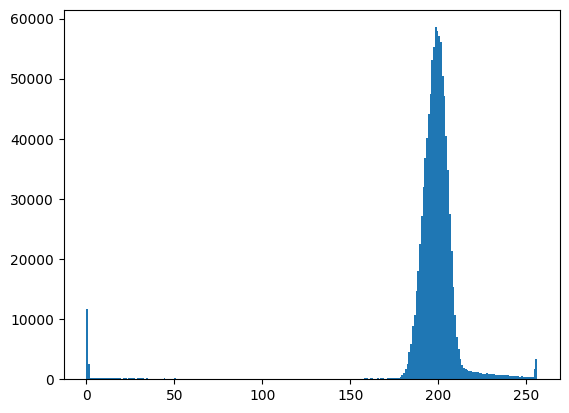

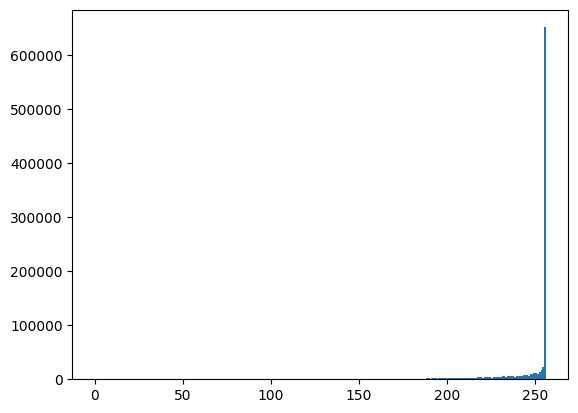

In [248]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/jun.jpg"
img = cv2.imread(path)
scale = 1.02
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 170, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 230, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 5:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 5     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
    path = "./dataset/kjh/kjh_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1


# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()


In [253]:
import cv2

h = []
w = []

# img size check
for i in range(81):
    path = "./dataset/kjh/kjh_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 70:
        print("max", img.shape, i)
    if max(shape) < 55:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

min (54, 54, 3) 10
max (73, 73, 3) 20
min (53, 52, 3) 21
max (74, 73, 3) 23
max (76, 76, 3) 35
max (71, 71, 3) 44
min (54, 54, 3) 45
max (73, 72, 3) 46
min (53, 53, 3) 49
max (71, 70, 3) 60
max (71, 71, 3) 66
min (54, 53, 3) 68
min (50, 50, 3) 78
max (77, 76, 3) 80
h_average : 62.629629629629626
w_average : 62.382716049382715


### 신우섭 81
- Resize scale = 0.4
- LPF Kernel size = 21

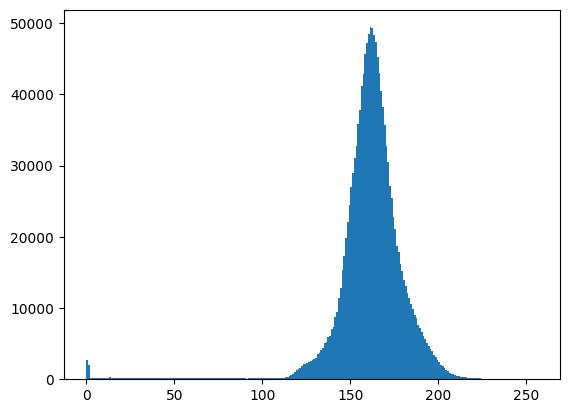

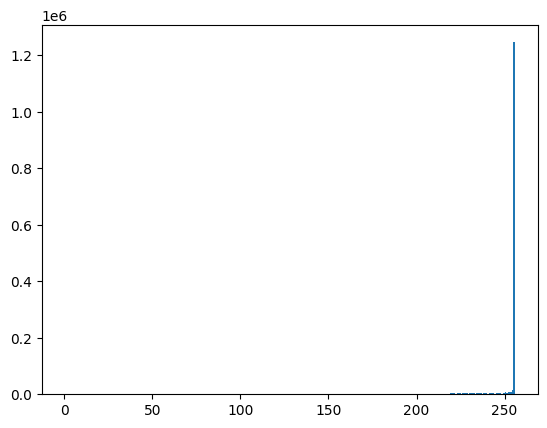

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/woo.jpg"
img = cv2.imread(path)
scale = 0.4
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 110, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 245, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(rimg, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 100:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 5     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
    path = "./dataset/sws/sws_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_unsharped", img_unsharped)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2

h = []
w = []

# img size check
for i in range(81):
    path = "./dataset/sws/sws_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 70:
        print("max", img.shape, i)
    if max(shape) < 60:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (72, 72, 3) 4
max (78, 78, 3) 5
max (71, 70, 3) 6
max (80, 79, 3) 7
max (77, 77, 3) 8
max (71, 71, 3) 12
max (71, 70, 3) 14
max (72, 71, 3) 16
min (58, 57, 3) 36
min (58, 58, 3) 44
min (59, 58, 3) 47
max (71, 70, 3) 49
min (55, 55, 3) 51
max (72, 72, 3) 52
min (57, 56, 3) 54
min (53, 52, 3) 56
min (59, 59, 3) 59
min (59, 59, 3) 61
min (53, 53, 3) 63
min (58, 58, 3) 65
min (51, 51, 3) 72
min (59, 59, 3) 75
min (57, 57, 3) 76
min (57, 56, 3) 77
max (71, 71, 3) 78
min (59, 59, 3) 80
h_average : 63.93827160493827
w_average : 63.629629629629626


### 석현빈 81
- Kernel size = 21
- Scale = 0.95

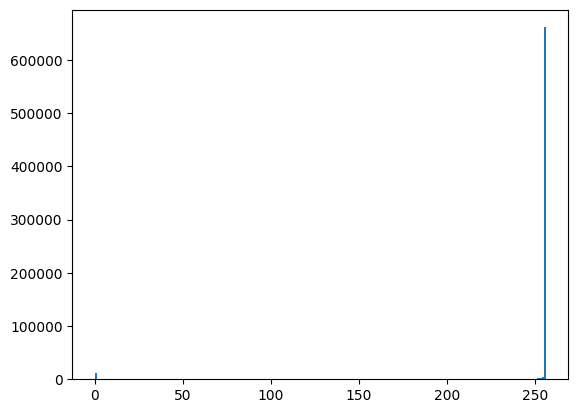

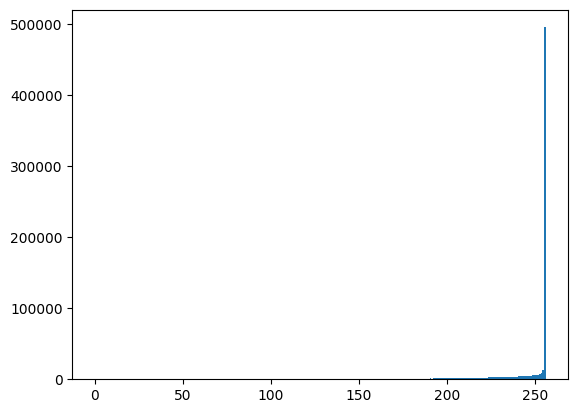

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/shb.jpg"
img = cv2.imread(path)
scale = 0.95
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_gray, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 245, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 5:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 5     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
    path = "./dataset/shb/shb_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
import cv2

# Img size check
h = []
w = []

for i in range(81):
    path = "./dataset/shb/shb_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 60:
        print("max", img.shape, i)
    if max(shape) < 40:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (72, 71, 3) 0
max (69, 68, 3) 1
max (70, 70, 3) 2
max (69, 68, 3) 3
max (80, 80, 3) 5
max (78, 77, 3) 6
max (76, 75, 3) 7
max (69, 68, 3) 8
max (63, 62, 3) 10
max (68, 67, 3) 12
max (65, 64, 3) 13
max (67, 66, 3) 15
max (69, 69, 3) 16
max (76, 76, 3) 17
max (63, 63, 3) 19
max (63, 63, 3) 21
max (63, 62, 3) 22
max (70, 70, 3) 23
max (72, 72, 3) 24
max (65, 65, 3) 25
max (62, 62, 3) 26
max (63, 62, 3) 27
max (62, 62, 3) 28
max (70, 69, 3) 29
max (62, 61, 3) 31
max (66, 65, 3) 32
max (63, 63, 3) 33
max (68, 67, 3) 34
max (71, 71, 3) 35
max (67, 67, 3) 37
max (66, 65, 3) 38
max (64, 64, 3) 39
max (67, 66, 3) 40
max (61, 61, 3) 41
max (68, 68, 3) 42
max (61, 61, 3) 43
max (68, 68, 3) 44
max (71, 71, 3) 47
max (65, 64, 3) 48
max (63, 63, 3) 50
max (71, 70, 3) 51
max (70, 69, 3) 52
max (64, 64, 3) 53
max (63, 62, 3) 55
max (63, 62, 3) 57
max (64, 64, 3) 58
max (64, 63, 3) 59
max (63, 63, 3) 60
max (65, 65, 3) 61
max (64, 63, 3) 62
max (61, 60, 3) 63
max (62, 62, 3) 64
max (65, 64, 3) 66
m

### 최호원 81
- Kernel size = 15
- Scale = 0.45

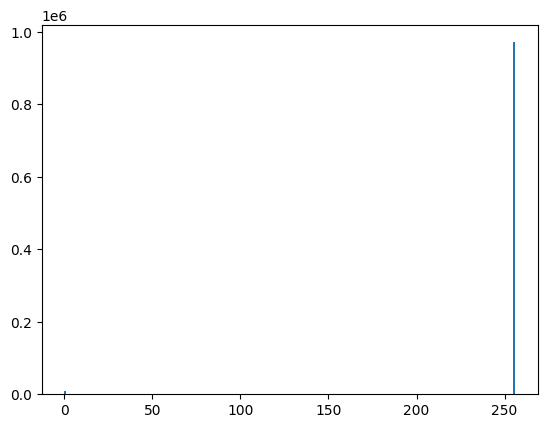

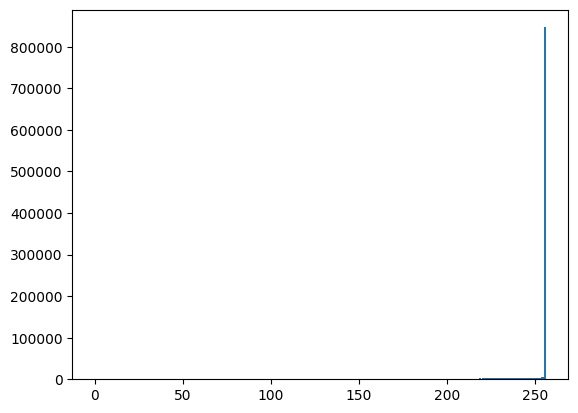

In [337]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/chw.jpg"
img = cv2.imread(path)
scale = 0.45
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_gray, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 250, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 5:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 5     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
    path = "./dataset/chw/chw_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [338]:
import cv2

# Img size check
h = []
w = []

for i in range(81):
    path = "./dataset/chw/chw_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 60:
        print("max", img.shape, i)
    if max(shape) < 40:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (64, 64, 3) 0
max (67, 67, 3) 1
max (62, 62, 3) 3
max (70, 69, 3) 4
max (68, 67, 3) 5
max (78, 77, 3) 6
max (74, 74, 3) 7
max (66, 65, 3) 8
max (63, 62, 3) 9
max (63, 63, 3) 10
max (66, 65, 3) 11
max (65, 64, 3) 12
max (64, 64, 3) 13
max (67, 67, 3) 16
max (69, 69, 3) 17
max (68, 68, 3) 18
max (69, 68, 3) 19
max (66, 65, 3) 21
max (63, 63, 3) 22
max (76, 75, 3) 23
max (70, 70, 3) 24
max (61, 60, 3) 26
max (66, 65, 3) 27
max (62, 62, 3) 30
max (71, 71, 3) 31
max (66, 65, 3) 33
max (67, 66, 3) 34
max (69, 69, 3) 35
max (66, 65, 3) 36
max (73, 72, 3) 37
max (62, 62, 3) 38
max (74, 73, 3) 39
max (67, 66, 3) 40
max (76, 76, 3) 41
max (67, 67, 3) 42
max (68, 68, 3) 43
max (63, 62, 3) 44
max (77, 76, 3) 45
max (61, 61, 3) 46
max (64, 63, 3) 47
max (67, 67, 3) 48
max (67, 66, 3) 50
max (62, 62, 3) 51
max (64, 63, 3) 53
max (62, 61, 3) 54
max (64, 63, 3) 57
max (64, 63, 3) 58
max (61, 60, 3) 59
max (63, 63, 3) 60
max (70, 70, 3) 61
max (63, 63, 3) 62
max (71, 70, 3) 63
max (69, 68, 3) 65
ma

### 방소나 81
- Scale = 0.28
- Kernel size = 17

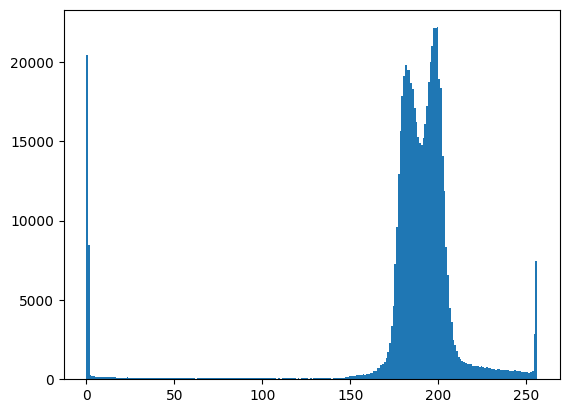

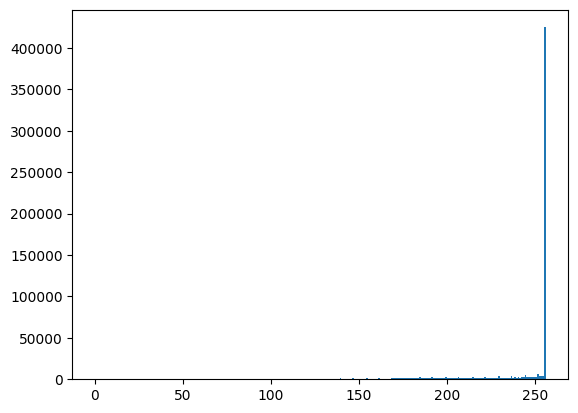

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/bsn.jpg"
img = cv2.imread(path)
scale = 0.28
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 240, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 5:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 5     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
    
    path = "./dataset/bsn/bsn_" + str(i) + ".jpg"
    cv2.imwrite(path, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2

# Img size check
h = []
w = []

for i in range(1,81):
    path = "./dataset/bsn/bsn_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 60:
        print("max", img.shape, i)
    if max(shape) < 40:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (67, 66, 3) 2
max (67, 67, 3) 3
max (63, 63, 3) 4
max (67, 68, 3) 5
max (71, 70, 3) 7
max (70, 70, 3) 8
max (66, 66, 3) 9
max (71, 71, 3) 10
max (73, 72, 3) 11
max (60, 61, 3) 14
max (65, 65, 3) 15
max (62, 62, 3) 16
max (70, 69, 3) 19
max (74, 74, 3) 20
max (66, 66, 3) 21
max (71, 71, 3) 22
max (70, 69, 3) 23
max (69, 69, 3) 24
max (68, 67, 3) 25
max (61, 61, 3) 26
max (66, 65, 3) 29
max (68, 68, 3) 31
max (63, 63, 3) 33
max (61, 60, 3) 34
max (66, 65, 3) 36
max (66, 67, 3) 37
max (68, 68, 3) 38
max (66, 66, 3) 40
max (61, 62, 3) 41
max (66, 65, 3) 42
max (64, 63, 3) 43
max (67, 66, 3) 45
max (64, 64, 3) 46
max (66, 65, 3) 47
max (70, 70, 3) 48
max (66, 65, 3) 50
max (67, 66, 3) 51
max (65, 65, 3) 53
max (65, 65, 3) 54
max (65, 65, 3) 56
max (63, 63, 3) 57
max (69, 68, 3) 62
max (62, 62, 3) 64
max (63, 62, 3) 68
max (62, 62, 3) 70
max (66, 66, 3) 73
max (64, 64, 3) 74
max (69, 69, 3) 76
max (61, 61, 3) 78
h_average : 62.7
w_average : 62.425


In [12]:
import cv2

for i in range(5, 84):
    path = "./dataset/bsn/bsn_" + str(i) + '.jpg'
    img = cv2.imread(path)

    path2 = "./dataset/bsn/1/bsn_" + str(i-3) + ".jpg"
    cv2.imwrite(path2, img)

### 이종호 81
- Kernel size = 17
- Scale = 1

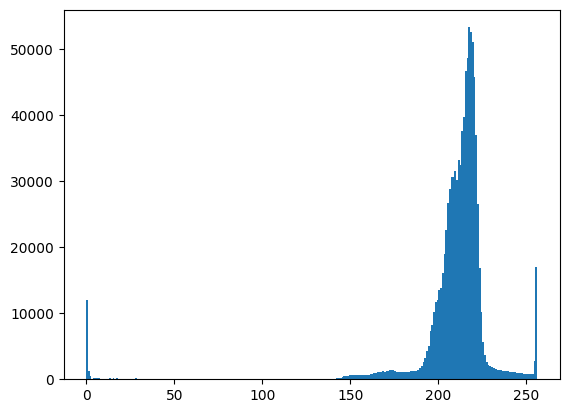

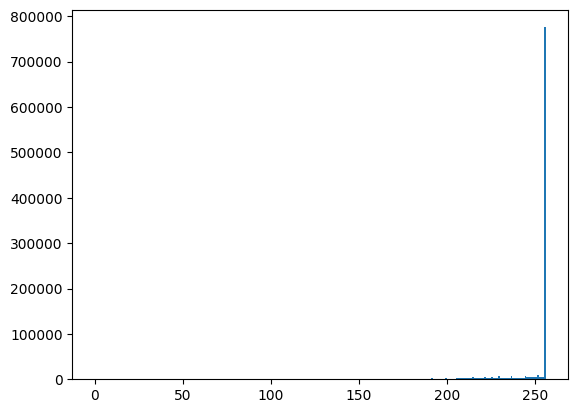

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/ljh.jpg"
img = cv2.imread(path)
scale = 1
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 135, 255, cv2.THRESH_BINARY)
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 245, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 100:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 2     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
        
    path1 = "./dataset/ljh/ljh_" + str(i) + ".jpg"
    cv2.imwrite(path1, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
import cv2

# Img size check
h = []
w = []

for i in range(81):
    path = "./dataset/ljh/ljh_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 60:
        print("max", img.shape, i)
    if max(shape) < 40:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (65, 64, 3) 0
max (67, 66, 3) 1
max (73, 73, 3) 2
max (70, 70, 3) 3
max (74, 73, 3) 4
max (69, 68, 3) 5
max (77, 76, 3) 6
max (72, 72, 3) 7
max (74, 73, 3) 8
max (65, 64, 3) 9
max (70, 70, 3) 10
max (64, 64, 3) 11
max (67, 67, 3) 12
max (64, 64, 3) 14
max (62, 61, 3) 15
max (68, 68, 3) 17
max (65, 65, 3) 18
max (66, 65, 3) 19
max (73, 72, 3) 20
max (70, 69, 3) 21
max (65, 65, 3) 22
max (73, 72, 3) 24
max (63, 62, 3) 25
max (69, 68, 3) 26
max (66, 66, 3) 27
max (68, 67, 3) 28
max (63, 63, 3) 29
max (70, 69, 3) 30
max (66, 65, 3) 32
max (61, 60, 3) 33
max (72, 72, 3) 34
max (67, 66, 3) 35
max (68, 68, 3) 36
max (66, 65, 3) 38
max (67, 66, 3) 39
max (72, 71, 3) 40
max (68, 67, 3) 41
max (68, 68, 3) 43
max (73, 73, 3) 44
max (66, 65, 3) 45
max (65, 64, 3) 47
max (71, 71, 3) 48
max (62, 61, 3) 49
max (61, 61, 3) 52
max (69, 68, 3) 53
max (68, 68, 3) 55
max (65, 65, 3) 58
max (69, 69, 3) 59
max (63, 63, 3) 60
max (63, 63, 3) 61
max (63, 62, 3) 66
max (65, 65, 3) 68
max (77, 76, 3) 69
max

### 박상문 81
- Kernel size = 15
- Scale = 0.9

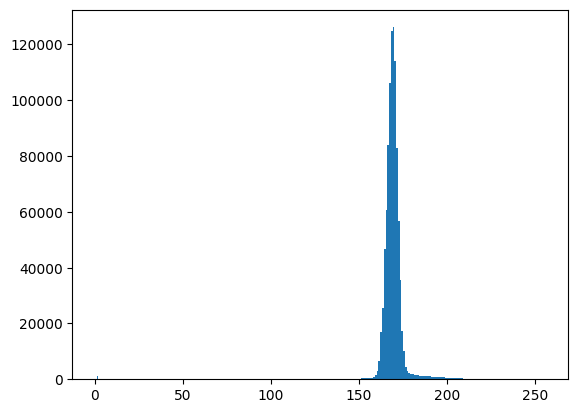

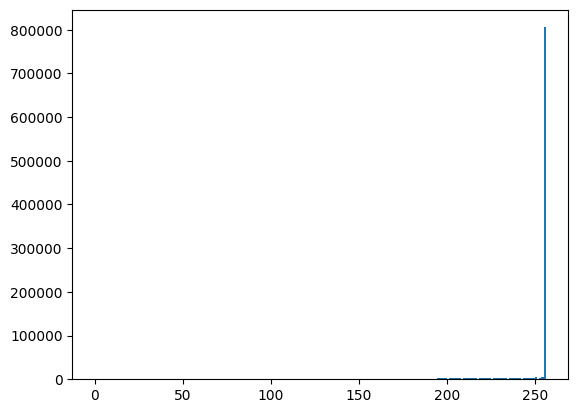

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/psm.jpg"
img = cv2.imread(path)
scale = 0.9
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)       # threshold 이상 값은 흰색으로 설정
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 245, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 100:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 3     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
        
    path1 = "./dataset/psm/psm_" + str(i) + ".jpg"
    cv2.imwrite(path1, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
import cv2

# Img size check
h = []
w = []

for i in range(81):
    path = "./dataset/psm/psm_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 70:
        print("max", img.shape, i)
    if max(shape) < 60:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

min (54, 53, 3) 0
min (59, 59, 3) 2
max (75, 74, 3) 6
min (50, 49, 3) 9
min (53, 52, 3) 11
max (73, 72, 3) 14
min (59, 59, 3) 15
max (71, 71, 3) 17
max (71, 71, 3) 23
max (73, 72, 3) 26
min (56, 55, 3) 27
min (54, 54, 3) 31
max (73, 73, 3) 34
max (74, 74, 3) 43
max (73, 72, 3) 48
min (58, 57, 3) 51
max (71, 70, 3) 53
min (58, 58, 3) 60
min (51, 52, 3) 63
min (56, 55, 3) 69
min (58, 57, 3) 73
min (54, 54, 3) 74
min (57, 57, 3) 75
min (54, 53, 3) 78
h_average : 63.7037037037037
w_average : 63.22222222222222


### 김범준 81
- Kernel size = 17
- Scale = 0.6

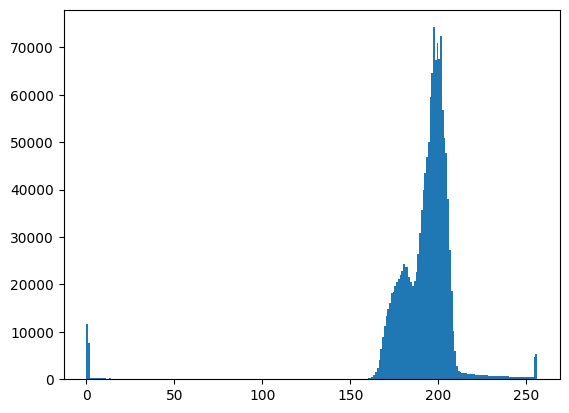

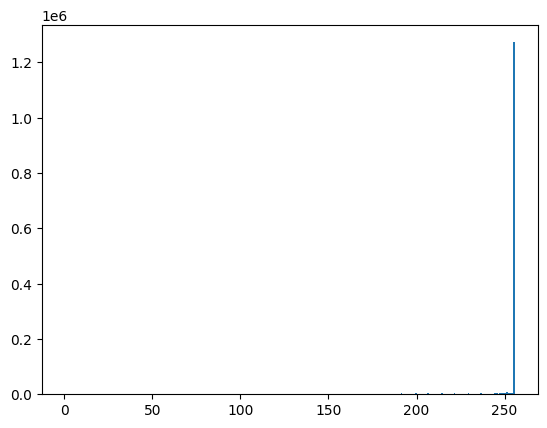

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/kbj.jpg"
img = cv2.imread(path)
scale = 0.6
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)       # threshold 이상 값은 흰색으로 설정
img_bin0 = 255 - img_bin

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 245, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 100:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 3     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
        
    path1 = "./dataset/kbj/1/kbj_" + str(i) + ".jpg"
    cv2.imwrite(path1, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import cv2

# Img size check
h = []
w = []

for i in range(81):
    path = "./dataset/kbj/1/kbj_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 70:
        print("max", img.shape, i)
    if max(shape) < 60:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (71, 70, 3) 1
max (76, 75, 3) 3
max (83, 83, 3) 5
max (83, 83, 3) 6
max (81, 80, 3) 7
max (76, 75, 3) 8
min (58, 58, 3) 9
max (74, 74, 3) 17
max (71, 70, 3) 20
max (73, 72, 3) 21
min (51, 51, 3) 22
max (82, 81, 3) 24
max (72, 72, 3) 26
min (59, 59, 3) 30
min (59, 58, 3) 32
min (56, 56, 3) 33
min (58, 57, 3) 36
max (75, 74, 3) 42
min (57, 56, 3) 46
min (59, 59, 3) 47
min (57, 57, 3) 49
max (71, 70, 3) 52
max (71, 71, 3) 53
min (59, 59, 3) 54
min (59, 59, 3) 55
min (55, 56, 3) 56
min (56, 55, 3) 57
min (56, 55, 3) 58
min (57, 57, 3) 59
min (49, 49, 3) 63
min (56, 56, 3) 65
min (56, 57, 3) 69
min (54, 53, 3) 77
min (54, 55, 3) 80
h_average : 64.39506172839506
w_average : 64.22222222222223


### 이승언
- Kernel size = 29
- Scale = 0.42

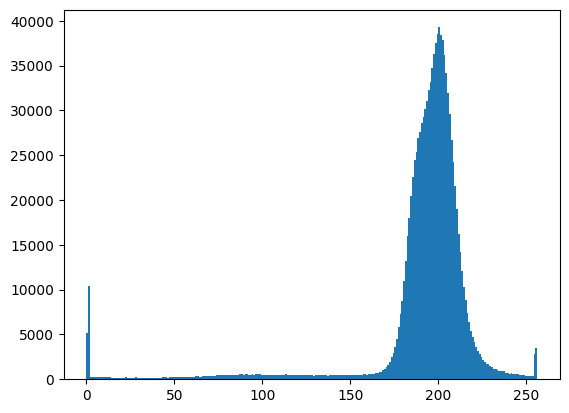

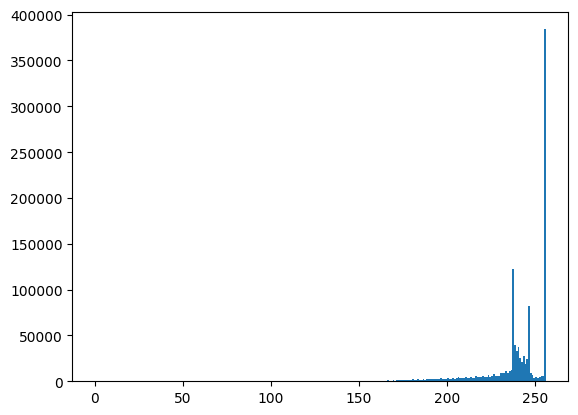

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Moving Average Fliter : kernel size
ksize = int(input('Enter kernel size:'))
kernel = np.ones((ksize, ksize), np.float32)/(ksize*ksize)

path = "./ori_data/lse.jpg"
img = cv2.imread(path)
scale = 0.42
rimg = cv2.resize(img, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

# Unsharped mask 적용
t_rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(t_rimg)
blur = cv2.GaussianBlur(Y, (0,0), 2)
filtered_Y = np.clip(2.0*Y - blur, 0, 255).astype(np.uint8)
img_unsharped = cv2.cvtColor(cv2.merge((filtered_Y, Cr, Cb)), cv2.COLOR_YCrCb2BGR)

# Grayscale 변환
img_gray = cv2.cvtColor(img_unsharped, cv2.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0, 256])
plt.show()

# 1st Threshold
_, img_bin = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)       # threshold 이상 값은 흰색으로 설정

# LPF 적용
filtered = cv2.filter2D(img_bin, -1, kernel)

plt.hist(filtered.ravel(), 256, [0, 256])
plt.show()

# 2nd Threshold
_, filtered0 = cv2.threshold(filtered, 225, 255, cv2.THRESH_BINARY)
filtered0 = 255-filtered0

# Contour #
contours, hierarchy = cv2.findContours(filtered0, cv2.RETR_EXTERNAL, 3)
img_contour = cv2.drawContours(img_unsharped, contours, -1, (0, 255, 0), 3)

contour_pos = []    # Contour 좌표 추출
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area > 300:    # 잘못된 영역 제거
        contour_pos.append(pos)

img_temp = img_bin  # 글씨 추출 source
tmp0 = 3     # 사각형 여유
i = 0

for pos in contour_pos: # 면적 부분 오려내기
    x, y, w, h = cv2.boundingRect(contours[pos])    # 사각형 좌표 잡아줌
    
    # 추후에 64x64 resize시 이미지 변형 최소화 위해, 정사각형으로 짜른다
    if h > w :
        tmp1 = int((h-w)/2)
        img_crop = img_temp[y-tmp0:y+h+tmp0, x-(tmp1+tmp0):x+w+(tmp1+tmp0)]
    else:
        tmp1 = int((w-h)/2)
        img_crop = img_temp[y-(tmp1+tmp0):y+h+(tmp1+tmp0), x-tmp0:x+w+tmp0]
        
    path1 = "./dataset/lse/lse_" + str(i) + ".jpg"
    cv2.imwrite(path1, img_crop) # 추출 글씨 저장
    i =  i + 1

# imshow #
cv2.imshow("rimg", rimg)
cv2.imshow("img_gray", img_gray)
cv2.imshow("img_bin", img_bin)
cv2.imshow("filtered", filtered)
cv2.imshow("filtered0", filtered0)
cv2.imshow("img_contour", img_contour)

key = cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
import cv2

# Img size check
h = []
w = []

for i in range(81):
    path = "./dataset/lse/lse_" + str(i) + ".jpg"
    img = cv2.imread(path)
    shape = img.shape
    
    if max(shape) > 60:
        print("max", img.shape, i)
    if max(shape) < 50:
        print("min", img.shape, i)
        
    h.append(shape[0])
    w.append(shape[1])

print("h_average :", sum(h)/len(h))
print("w_average :", sum(w)/len(w))

key = cv2.waitKey(0)
cv2.destroyAllWindows()

max (36, 63, 3) 0
max (66, 66, 3) 1
max (70, 70, 3) 2
max (67, 67, 3) 3
max (68, 68, 3) 4
max (73, 73, 3) 5
max (68, 68, 3) 6
max (78, 78, 3) 7
max (76, 75, 3) 8
max (74, 74, 3) 9
max (70, 69, 3) 11
max (70, 70, 3) 12
max (65, 65, 3) 13
max (71, 71, 3) 14
max (69, 68, 3) 15
max (63, 62, 3) 16
max (74, 74, 3) 17
max (64, 64, 3) 18
max (74, 75, 3) 19
max (68, 68, 3) 22
max (75, 75, 3) 23
max (62, 61, 3) 24
max (72, 71, 3) 26
max (69, 68, 3) 27
max (61, 60, 3) 28
max (70, 69, 3) 29
max (64, 64, 3) 30
max (67, 66, 3) 32
max (68, 68, 3) 33
max (67, 67, 3) 34
max (69, 68, 3) 35
max (65, 64, 3) 36
max (62, 62, 3) 37
max (61, 61, 3) 38
max (66, 65, 3) 39
max (66, 66, 3) 40
max (66, 66, 3) 41
max (62, 61, 3) 44
max (66, 65, 3) 45
max (63, 64, 3) 49
max (71, 71, 3) 50
max (61, 61, 3) 51
max (64, 63, 3) 52
max (64, 63, 3) 53
max (72, 72, 3) 54
max (62, 61, 3) 56
max (67, 66, 3) 57
max (64, 64, 3) 58
max (79, 79, 3) 59
max (61, 62, 3) 60
max (66, 65, 3) 61
max (69, 70, 3) 62
max (68, 68, 3) 63
max

In [88]:
import cv2

for i in range(1, 82):
    path = "./dataset/lse/lse_" + str(i) + '.jpg'
    img = cv2.imread(path)

    path2 = "./dataset/lse/1/lse_" + str(i-1) + ".jpg"
    cv2.imwrite(path2, img)

In [98]:
import cv2

for i in range(81):
    path = "./dataset/lse/1/lse_" + str(i) + ".jpg" 
    img = cv2.imread(path)
    
    # 1st Threshold
    _, img_bin = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   
    
    path1 = "./dataset/lse/1/tmp/lse_" + str(i) + ".jpg"
    cv2.imwrite(path1, img_bin) 
